## Problema 1: Newton-Raphson en 2D para Polinomios Cúbicos

In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos el x y la funcion 
x = sp.symbols('x')
funcion = 3*x**3 - 10*x**2 - 56*x + 50

# Calculamos la primera y segunda derivada
primera_derivada = sp.diff(funcion, x)
segunda_derivada = sp.diff(primera_derivada, x)

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify(x, funcion, 'numpy')
primera_derivada_np = sp.lambdify(x, primera_derivada, 'numpy')
segunda_derivada_np = sp.lambdify(x, segunda_derivada, 'numpy')

# Implementamos Newton-Raphson
def newton_raphson(primera_derivada, segunda_derivada, x_0, alpha , tol = 1e-7, max_iter = 100):
    x_k = x_0

    for k in range(max_iter):
        gradiente = primera_derivada(x_k)
        hessiana = segunda_derivada(x_k) 

        if abs(hessiana) < 1e-10:
            hessiana = 1e-10 if hessiana >= 0 else -1e-10

        x_k1 = x_k - alpha * (gradiente/hessiana)
        x_k = x_k1

        if abs(primera_derivada(x_k1)) < tol:
            return x_k1

    return x_k

# Determinamos los diferentes valores iniciales de x_0 y alpha
x_inciales = [-6, 6]
alphas = [0.1, 0.2]
resultados = []

for x_0 in x_inciales:
    for alpha in alphas:
        solucion = newton_raphson(primera_derivada_np, segunda_derivada_np, x_0, alpha)

        valor_funcion = funcion_np(solucion)
        valor_segunda_derivada = segunda_derivada_np(solucion)

        if valor_segunda_derivada > 0:
            tipo = "mínimo local"
        elif valor_segunda_derivada < 0:
            tipo = "máximo local"
        else:
            tipo = "punto de inflexión"

        resultados.append((x_0, solucion, valor_funcion, tipo, alpha))
        print(f"x0 = {x_0}, x* = {solucion:.6f}, f(x*) = {valor_funcion:.6f}, α = {alpha:.3f}, {tipo}")

x0 = -6, x* = -1.619822, f(x*) = 101.721419, α = 0.100, máximo local
x0 = -6, x* = -1.619601, f(x*) = 101.721420, α = 0.200, máximo local
x0 = 6, x* = 3.841906, f(x*) = -142.626770, α = 0.100, mínimo local
x0 = 6, x* = 3.841823, f(x*) = -142.626770, α = 0.200, mínimo local


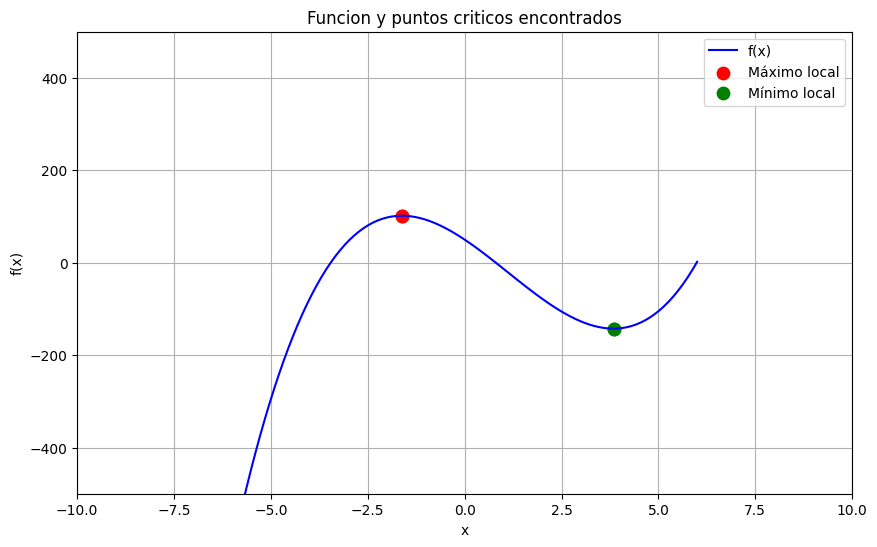

In [8]:
x_vals = np.linspace(-6, 6, 100)
y_vals = funcion_np(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='blue')

for (x_0, x_sol, y_sol, tipo, alpha) in resultados:
    if tipo == "mínimo local":
        plt.scatter(x_sol, y_sol, color='green', s=80, label='Mínimo local' if 'mínimo local' not in [r[3] for r in resultados[:resultados.index((x_0, x_sol, y_sol, tipo, alpha))]] else "")
    elif tipo == "máximo local":
        plt.scatter(x_sol, y_sol, color='red', s=80, label='Máximo local' if 'máximo local' not in [r[3] for r in resultados[:resultados.index((x_0, x_sol, y_sol, tipo, alpha))]] else "")
    else:
        plt.scatter(x_sol, y_sol, color='orange', s=80, label='Punto de inflexión' if 'punto de inflexión' not in [r[3] for r in resultados[:resultados.index((x_0, x_sol, y_sol, tipo, alpha))]] else "")

plt.title("Funcion y puntos criticos encontrados")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-500, 500)
plt.grid(True)
plt.show()

## Problema 2: Análisis de Extremos Locales y Globales

## Problema 3: Newton-Raphson Multidimensional

## Problema 4: Gradiente Descendente en Optimización

## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento